In [7]:
%matplotlib inline

import matplotlib as mpl
mpl.use('Agg')

from matplotlib.pyplot import imshow

In [10]:
import model
from model.captcha_cracker import CaptchaCracker
import os
import theano
theano.config.floatX = "float64"

lstm_model_params_prefix = '/home/geetika/captcha/dataset_ssd_1T/simpledataset_nvocab/lstm_variable_run'
cracker = model.captcha_cracker.CaptchaCracker(
    lstm_model_params_prefix, includeCapital=False, multi_chars=True,
    rescale_in_preprocessing=False, num_rnn_steps=6, use_mask_input=True)

import os
from PIL import Image
import numpy
import random


image_dir = '/home/geetika/captcha/dataset/simpledataset'

import model
files = os.listdir(image_dir)

The output file is available at /home/geetika/model_graph.png


/home/geetika/captcha/dataset/simpledataset/1_pnagk.jpg
pnagkunk
predicted_char= p
[('p', 0.9990700790955146), ('g', 0.00062521276663483406), ('n', 0.00013263041688531228), ('e', 9.3196910268438554e-05), ('c', 2.8929760416366692e-05), ('d', 1.2122268073527535e-05), ('b', 1.1592552286531664e-05), ('m', 1.0098900378215545e-05), ('6', 8.7053772526096466e-06), ('a', 4.6221269793195219e-06)]
predicted_char= n
[('n', 0.99801040243692929), ('r', 0.001434049650561317), ('m', 0.00030976130591514926), ('h', 0.00021220430490649254), ('f', 1.4867654091715268e-05), ('p', 8.3218605083868486e-06), ('g', 5.1086837478280843e-06), ('a', 3.220370922938476e-06), ('w', 1.2644363211941747e-06), ('d', 5.1396160435929753e-07)]
predicted_char= a
[('a', 0.99979891772851059), ('e', 0.0001580904514626722), ('m', 2.1305920701581805e-05), ('b', 1.7841092700730173e-05), ('p', 2.9555777214444955e-06), ('2', 2.8375133928526007e-07), ('d', 1.2979061089170657e-07), ('c', 1.2658742148964207e-07), ('w', 1.1682286551675606

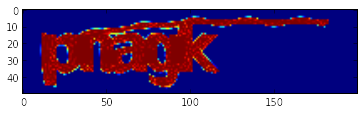

In [11]:
file_path = os.path.join(image_dir, random.choice(files))
print file_path

# Converted image.
imshow(numpy.asarray(Image.open(file_path).convert('L')))


predicted_chars, char_probabilities = cracker.InferFromImagePath(file_path)

print "".join(x for x in predicted_chars)

for i in range(len(predicted_chars)):
    print 'predicted_char= {0}'.format(predicted_chars[i])
    print sorted([(char, prob) for char, prob in char_probabilities[i].iteritems()], key=lambda x: x[1], reverse=True)[:10]